In [1]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(data.table)
    library(Matrix)
    library(Seurat)
    library(R.utils)
})

Warning message:
"package 'ggplot2' was built under R version 4.4.2"
Warning message:
"package 'tibble' was built under R version 4.4.2"
Warning message:
"package 'tidyr' was built under R version 4.4.2"
Warning message:
"package 'dplyr' was built under R version 4.4.2"
Warning message:
"package 'data.table' was built under R version 4.4.2"


Read in the data

In [2]:
postTrans <- readRDS(file = "Data/seu.integrated.resolution_search.rds")
postTrans

An object of class Seurat 
36601 features across 24606 samples within 1 assay 
Active assay: RNA (36601 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 3 dimensional reductions calculated: pca, umap, integrated.harmony

In [3]:
head(postTrans)

orig.ident nCount_RNA nFeature_RNA percent.mt sample
A_AAACGCTTCACTTGTT_A_pos BMT_A      29477      6684         2.337416   A     
A_AAAGGATCAATGCAGG_A_pos BMT_A      43334      7226         5.169151   A     
A_AAAGGATGTGCGAGTA_A_pos BMT_A      46221      7362         4.013327   A     
A_AAAGGATTCACTGATG_A_pos BMT_A      25484      4623         7.243761   A     
A_AAAGGGCCACCCTCTA_A_pos BMT_A      28699      6420         2.871180   A     
A_AAAGGTAGTCGCATCG_A_pos BMT_A      20363      4041         4.262633   A     
A_AAAGGTATCATTGTGG_A_pos BMT_A      31372      6826         6.802244   A     
A_AAAGGTATCCGAGGCT_A_pos BMT_A      31802      5299         6.716559   A     
A_AAAGGTATCGGTCACG_A_pos BMT_A      48519      7748         6.618026   A     
A_AAAGGTATCTCGCAGG_A_pos BMT_A      14838      3548         4.960237   A     
                         barcode                CD34_subsample CD34 nCount_HTO
A_AAACGCTTCACTTGTT_A_pos AAACGCTTCACTTGTT_A_pos pos            pos  12.98252  
A_AAAGGATCAATGCAGG_A_pos AAAGGATCAATGCAGG_A_pos pos            pos  15.07064  
A_AAAGGATGTGCGAGTA_A_pos AAAGGATGTGCGAGTA_A_pos pos            pos  15.09084  
A_AAAGGATTCACTGATG_A_pos AAAGGATTCACTGATG_A_pos pos            pos  15.47098  
A_AAAGGGCCACCCTCTA_A_pos AAAGGGCCACCCTCTA_A_pos pos            pos  13.40386  
A_AAAGGTAGTCGCATCG_A_pos AAAGGTAGTCGCATCG_A_pos pos            pos  13.97667  
A_AAAGGTATCATTGTGG_A_pos AAAGGTATCATTGTGG_A_pos pos            pos  14.06007  
A_AAAGGTATCCGAGGCT_A_pos AAAGGTATCCGAGGCT_A_pos pos            pos  13.56754  
A_AAAGGTATCGGTCACG_A_pos AAAGGTATCGGTCACG_A_pos pos            pos  13.91961  
A_AAAGGTATCTCGCAGG_A_pos AAAGGTATCTCGCAGG_A_pos pos            pos  14.14402  
                         nFeature_HTO ⋯ seurat_clusters_resolution_0.1
A_AAACGCTTCACTTGTT_A_pos 7            ⋯ 1                             
A_AAAGGATCAATGCAGG_A_pos 7            ⋯ 3                             
A_AAAGGATGTGCGAGTA_A_pos 7            ⋯ 1                             
A_AAAGGATTCACTGATG_A_pos 7            ⋯ 3                             
A_AAAGGGCCACCCTCTA_A_pos 7            ⋯ 4                             
A_AAAGGTAGTCGCATCG_A_pos 7            ⋯ 1                             
A_AAAGGTATCATTGTGG_A_pos 7            ⋯ 1                             
A_AAAGGTATCCGAGGCT_A_pos 7            ⋯ 0                             
A_AAAGGTATCGGTCACG_A_pos 7            ⋯ 0                             
A_AAAGGTATCTCGCAGG_A_pos 7            ⋯ 1                             
                         seurat_clusters_resolution_0.2
A_AAACGCTTCACTTGTT_A_pos 4                             
A_AAAGGATCAATGCAGG_A_pos 5                             
A_AAAGGATGTGCGAGTA_A_pos 4                             
A_AAAGGATTCACTGATG_A_pos 5                             
A_AAAGGGCCACCCTCTA_A_pos 6                             
A_AAAGGTAGTCGCATCG_A_pos 2                             
A_AAAGGTATCATTGTGG_A_pos 4                             
A_AAAGGTATCCGAGGCT_A_pos 1                             
A_AAAGGTATCGGTCACG_A_pos 1                             
A_AAAGGTATCTCGCAGG_A_pos 2                             
                         seurat_clusters_resolution_0.3
A_AAACGCTTCACTTGTT_A_pos 4                             
A_AAAGGATCAATGCAGG_A_pos 5                             
A_AAAGGATGTGCGAGTA_A_pos 4                             
A_AAAGGATTCACTGATG_A_pos 5                             
A_AAAGGGCCACCCTCTA_A_pos 7                             
A_AAAGGTAGTCGCATCG_A_pos 2                             
A_AAAGGTATCATTGTGG_A_pos 2                             
A_AAAGGTATCCGAGGCT_A_pos 1                             
A_AAAGGTATCGGTCACG_A_pos 1                             
A_AAAGGTATCTCGCAGG_A_pos 2                             
                         seurat_clusters_resolution_0.4
A_AAACGCTTCACTTGTT_A_pos 4                             
A_AAAGGATCAATGCAGG_A_pos 5                             
A_AAAGGATGTGCGAGTA_A_pos 4                             
A_AAAGGATTCACTGATG_A_pos 5                             
A_AAA

In [4]:
posttrans_plot <- UMAPPlot(postTrans) + scale_x_reverse()

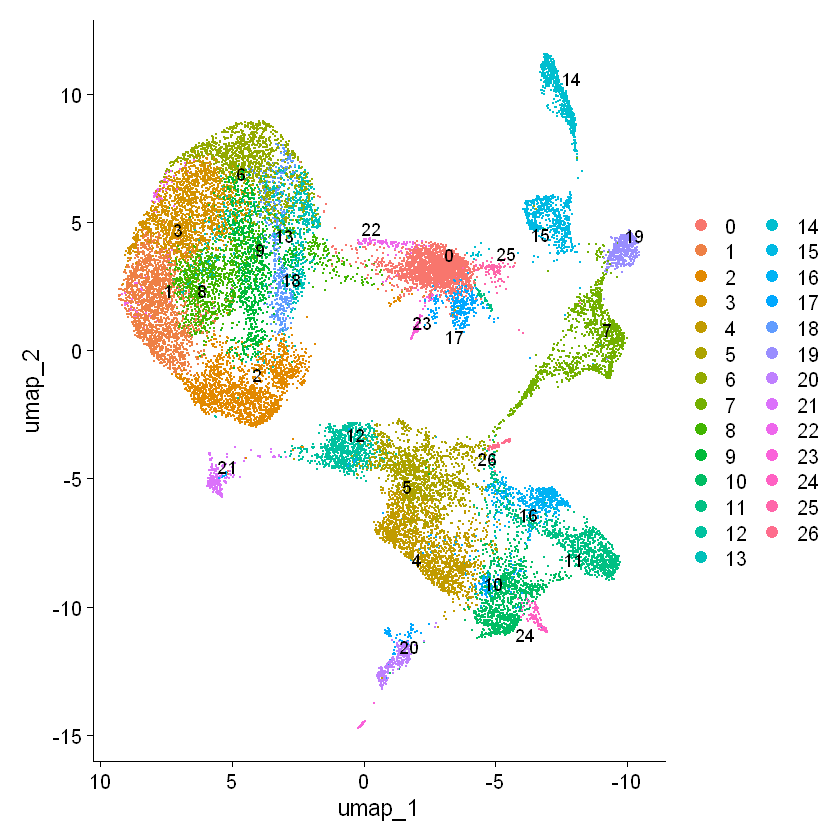

In [5]:
LabelClusters(plot = posttrans_plot, id = "ident")

In [6]:
postTrans_rev <- subset(postTrans, subset = (percent.mt <= 10))

In [7]:
head(postTrans_rev)

orig.ident nCount_RNA nFeature_RNA percent.mt sample
A_AAACGCTTCACTTGTT_A_pos BMT_A      29477      6684         2.337416   A     
A_AAAGGATCAATGCAGG_A_pos BMT_A      43334      7226         5.169151   A     
A_AAAGGATGTGCGAGTA_A_pos BMT_A      46221      7362         4.013327   A     
A_AAAGGATTCACTGATG_A_pos BMT_A      25484      4623         7.243761   A     
A_AAAGGGCCACCCTCTA_A_pos BMT_A      28699      6420         2.871180   A     
A_AAAGGTAGTCGCATCG_A_pos BMT_A      20363      4041         4.262633   A     
A_AAAGGTATCATTGTGG_A_pos BMT_A      31372      6826         6.802244   A     
A_AAAGGTATCCGAGGCT_A_pos BMT_A      31802      5299         6.716559   A     
A_AAAGGTATCGGTCACG_A_pos BMT_A      48519      7748         6.618026   A     
A_AAAGGTATCTCGCAGG_A_pos BMT_A      14838      3548         4.960237   A     
                         barcode                CD34_subsample CD34 nCount_HTO
A_AAACGCTTCACTTGTT_A_pos AAACGCTTCACTTGTT_A_pos pos            pos  12.98252  
A_AAAGGATCAATGCAGG_A_pos AAAGGATCAATGCAGG_A_pos pos            pos  15.07064  
A_AAAGGATGTGCGAGTA_A_pos AAAGGATGTGCGAGTA_A_pos pos            pos  15.09084  
A_AAAGGATTCACTGATG_A_pos AAAGGATTCACTGATG_A_pos pos            pos  15.47098  
A_AAAGGGCCACCCTCTA_A_pos AAAGGGCCACCCTCTA_A_pos pos            pos  13.40386  
A_AAAGGTAGTCGCATCG_A_pos AAAGGTAGTCGCATCG_A_pos pos            pos  13.97667  
A_AAAGGTATCATTGTGG_A_pos AAAGGTATCATTGTGG_A_pos pos            pos  14.06007  
A_AAAGGTATCCGAGGCT_A_pos AAAGGTATCCGAGGCT_A_pos pos            pos  13.56754  
A_AAAGGTATCGGTCACG_A_pos AAAGGTATCGGTCACG_A_pos pos            pos  13.91961  
A_AAAGGTATCTCGCAGG_A_pos AAAGGTATCTCGCAGG_A_pos pos            pos  14.14402  
                         nFeature_HTO ⋯ seurat_clusters_resolution_0.1
A_AAACGCTTCACTTGTT_A_pos 7            ⋯ 1                             
A_AAAGGATCAATGCAGG_A_pos 7            ⋯ 3                             
A_AAAGGATGTGCGAGTA_A_pos 7            ⋯ 1                             
A_AAAGGATTCACTGATG_A_pos 7            ⋯ 3                             
A_AAAGGGCCACCCTCTA_A_pos 7            ⋯ 4                             
A_AAAGGTAGTCGCATCG_A_pos 7            ⋯ 1                             
A_AAAGGTATCATTGTGG_A_pos 7            ⋯ 1                             
A_AAAGGTATCCGAGGCT_A_pos 7            ⋯ 0                             
A_AAAGGTATCGGTCACG_A_pos 7            ⋯ 0                             
A_AAAGGTATCTCGCAGG_A_pos 7            ⋯ 1                             
                         seurat_clusters_resolution_0.2
A_AAACGCTTCACTTGTT_A_pos 4                             
A_AAAGGATCAATGCAGG_A_pos 5                             
A_AAAGGATGTGCGAGTA_A_pos 4                             
A_AAAGGATTCACTGATG_A_pos 5                             
A_AAAGGGCCACCCTCTA_A_pos 6                             
A_AAAGGTAGTCGCATCG_A_pos 2                             
A_AAAGGTATCATTGTGG_A_pos 4                             
A_AAAGGTATCCGAGGCT_A_pos 1                             
A_AAAGGTATCGGTCACG_A_pos 1                             
A_AAAGGTATCTCGCAGG_A_pos 2                             
                         seurat_clusters_resolution_0.3
A_AAACGCTTCACTTGTT_A_pos 4                             
A_AAAGGATCAATGCAGG_A_pos 5                             
A_AAAGGATGTGCGAGTA_A_pos 4                             
A_AAAGGATTCACTGATG_A_pos 5                             
A_AAAGGGCCACCCTCTA_A_pos 7                             
A_AAAGGTAGTCGCATCG_A_pos 2                             
A_AAAGGTATCATTGTGG_A_pos 2                             
A_AAAGGTATCCGAGGCT_A_pos 1                             
A_AAAGGTATCGGTCACG_A_pos 1                             
A_AAAGGTATCTCGCAGG_A_pos 2                             
                         seurat_clusters_resolution_0.4
A_AAACGCTTCACTTGTT_A_pos 4                             
A_AAAGGATCAATGCAGG_A_pos 5                             
A_AAAGGATGTGCGAGTA_A_pos 4                             
A_AAAGGATTCACTGATG_A_pos 5                             
A_AAA

In [8]:
postTrans_rev_plot <- UMAPPlot(postTrans_rev) + scale_x_reverse()

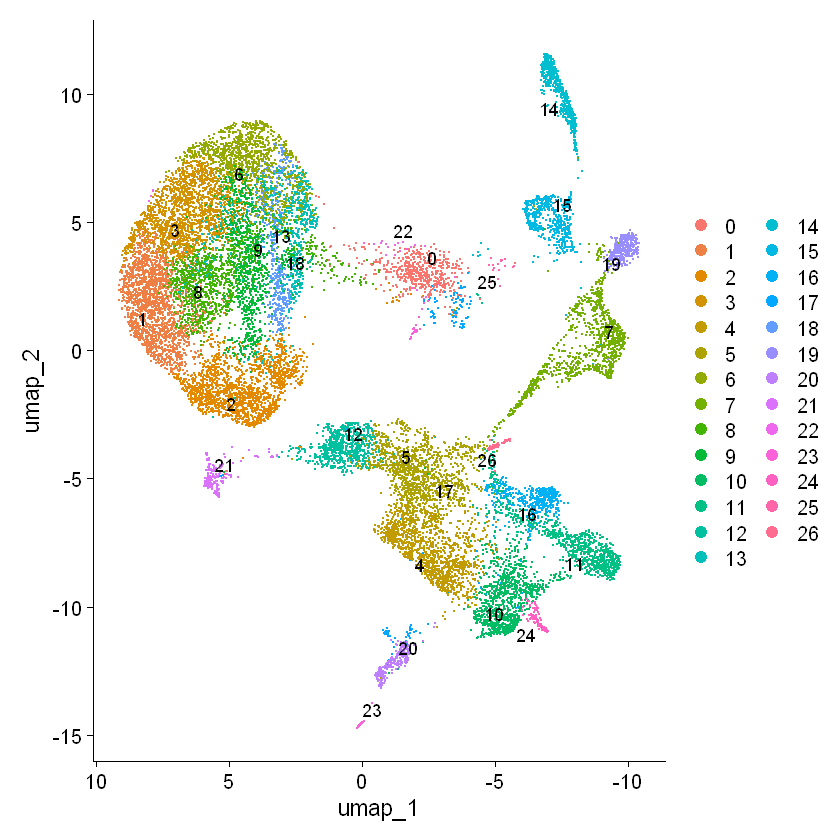

In [9]:
LabelClusters(plot = postTrans_rev_plot, id = "ident")

In [10]:
rownames(postTrans_rev)

[1] "MIR1302-2HG"       "FAM138A"           "OR4F5"            
    [4] "AL627309.1"        "AL627309.3"        "AL627309.2"       
    [7] "AL627309.5"        "AL627309.4"        "AP006222.2"       
   [10] "AL732372.1"        "OR4F29"            "AC114498.1"       
   [13] "OR4F16"            "AL669831.2"        "LINC01409"        
   [16] "FAM87B"            "LINC01128"         "LINC00115"        
   [19] "FAM41C"            "AL645608.6"        "AL645608.2"       
   [22] "AL645608.4"        "LINC02593"         "SAMD11"           
   [25] "NOC2L"             "KLHL17"            "PLEKHN1"          
   [28] "PERM1"             "AL645608.7"        "HES4"             
   [31] "ISG15"             "AL645608.1"        "AGRN"             
   [34] "AL645608.5"        "AL645608.8"        "RNF223"           
   [37] "C1orf159"          "AL390719.3"        "LINC01342"        
   [40] "AL390719.2"        "TTLL10-AS1"        "TTLL10"           
   [43] "TNFRSF18"          "TNFRSF4"           "SDF4"             
   [46] "B3GALT6"           "C1QTNF12"          "AL162741.1"       
   [49] "UBE2J2"            "LINC01786"         "SCNN1D"           
   [52] "ACAP3"             "PUSL1"             "INTS11"           
   [55] "AL139287.1"        "CPTP"              "TAS1R3"           
   [58] "DVL1"              "MXRA8"             "AURKAIP1"         
   [61] "CCNL2"             "MRPL20-AS1"        "MRPL20"           
   [64] "AL391244.2"        "ANKRD65"           "AL391244.1"       
   [67] "TMEM88B"           "LINC01770"         "VWA1"             
   [70] "ATAD3C"            "ATAD3B"            "ATAD3A"           
   [73] "TMEM240"           "SSU72"             "AL645728.1"       
   [76] "FNDC10"            "AL691432.4"        "AL691432.2"       
   [79] "MIB2"              "MMP23B"            "CDK11B"           
   [82] "FO704657.1"        "SLC35E2B"          "CDK11A"           
   [85] "SLC35E2A"          "NADK"              "GNB1"             
   [88] "AL109917.1"        "CALML6"            "TMEM52"           
   [91] "CFAP74"            "AL391845.2"        "GABRD"            
   [94] "AL391845.1"        "PRKCZ"             "AL590822.2"       
   [97] "PRKCZ-AS1"         "FAAP20"            "AL590822.1"       
  [100] "SKI"               "AL590822.3"        "MORN1"            
  [103] "AL589739.1"        "AL513477.2"        "RER1"             
  [106] "PEX10"             "PLCH2"             "AL139246.1"       
  [109] "AL139246.4"        "PANK4"             "HES5"             
  [112] "AL139246.5"        "TNFRSF14-AS1"      "TNFRSF14"         
  [115] "AL139246.3"        "PRXL2B"            "MMEL1"            
  [118] "AL831784.1"        "TTC34"             "AC242022.2"       
  [121] "AC242022.1"        "AL592464.2"        "AL592464.3"       
  [124] "AL592464.1"        "AL589702.1"        "ACTRT2"           
  [127] "PRDM16-DT"         "PRDM16"            "AL008733.1"       
  [130] "AL590438.1"        "AL354743.2"        "AL354743.1"       
  [133] "ARHGEF16"          "AL512413.1"        "MEGF6"            
  [136] "AL513320.1"        "TPRG1L"            "WRAP73"           
  [139] "TP73"              "AL136528.1"        "AL136528.2"       
  [142] "CCDC27"            "SMIM1"             "LRRC47"           
  [145] "AL365330.1"        "CEP104"            "DFFB"             
  [148] "C1orf174"          "LINC01134"         "LINC01346"        
  [151] "LINC01345"         "LINC02780"         "AL805961.1"       
  [154] "LINC01777"         "AL355602.1"        "Z98747.1"         
  [157] "LINC01646"         "AJAP1"             "Z98886.1"         
  [160] "BX005132.1"        "LINC02781"         "LINC02782"        
  [163] "AL139823.1"        "Z98259.3"          "Z98259.2"         
  [166] "Z98259.1"          "AL365255.1"        "NPHP4"            
  [169] "KCNAB2"            "CHD5"              "RPL22"            
  [172] "AL031847.1"        "RNF207"            "ICMT"             
  [175] "LINC00337"         "HES3"              "GPR153"    

In [11]:
nrow(postTrans_rev)

[1] 36601

In [12]:
colnames(postTrans_rev)

[1] "A_AAACGCTTCACTTGTT_A_pos"  "A_AAAGGATCAATGCAGG_A_pos" 
    [3] "A_AAAGGATGTGCGAGTA_A_pos"  "A_AAAGGATTCACTGATG_A_pos" 
    [5] "A_AAAGGGCCACCCTCTA_A_pos"  "A_AAAGGTAGTCGCATCG_A_pos" 
    [7] "A_AAAGGTATCATTGTGG_A_pos"  "A_AAAGGTATCCGAGGCT_A_pos" 
    [9] "A_AAAGGTATCGGTCACG_A_pos"  "A_AAAGGTATCTCGCAGG_A_pos" 
   [11] "A_AAAGTGACAAAGTATG_A_pos"  "A_AACAAAGAGGGCCCTT_A_pos" 
   [13] "A_AACAAAGGTGCTCTTC_A_pos"  "A_AACAAAGTCTGCATAG_A_pos" 
   [15] "A_AACACACAGCAAACAT_A_pos"  "A_AACACACAGCGAGGAG_A_pos" 
   [17] "A_AACACACTCTCAATCT_A_pos"  "A_AACCAACCAGAACCGA_A_pos" 
   [19] "A_AACCACAAGTCAACAA_A_pos"  "A_AACCACATCCATTGTT_A_pos" 
   [21] "A_AACCATGCAGTTCTAG_A_pos"  "A_AACCTGATCAAACGAA_A_pos" 
   [23] "A_AACGAAAAGTTGTCAC_A_pos"  "A_AACGGGAGTTGCAAGG_A_pos" 
   [25] "A_AACTTCTGTGTAAATG_A_pos"  "A_AACTTCTTCAGTGGGA_A_pos" 
   [27] "A_AACTTCTTCATGGAGG_A_pos"  "A_AAGACAAGTCAACGCC_A_pos" 
   [29] "A_AAGACTCGTGAATGAT_A_pos"  "A_AAGATAGCAATGCAAA_A_pos" 
   [31] "A_AAGATAGCACAGTCGC_A_pos"  "A_AAGATAGCAGTCAGTT_A_pos" 
   [33] "A_AAGATAGTCTCACGAA_A_pos"  "A_AAGCATCAGGCCGCTT_A_pos" 
   [35] "A_AAGCATCGTCATACCA_A_pos"  "A_AAGCCATCAATCTGCA_A_pos" 
   [37] "A_AAGCGTTAGTCCTGTA_A_pos"  "A_AAGGAATCACCCTATC_A_pos" 
   [39] "A_AAGGAATCATTGACAC_A_pos"  "A_AAGGTAAGTTCAGGTT_A_pos" 
   [41] "A_AAGTACCGTTGCGAAG_A_pos"  "A_AAGTCGTCAGTGAGCA_A_pos" 
   [43] "A_AAGTGAAGTATGTGTC_A_pos"  "A_AAGTGAAGTGACGTCC_A_pos" 
   [45] "A_AAGTTCGAGTCGAAAT_A_pos"  "A_AATAGAGAGTACAGCG_A_pos" 
   [47] "A_AATCACGGTATGAAGT_A_pos"  "A_AATCGACCAACTGGTT_A_pos" 
   [49] "A_AATCGACCAATTGAAG_A_pos"  "A_AATCGTGAGGCTCTAT_A_pos" 
   [51] "A_AATCGTGGTAGTCGTT_A_pos"  "A_AATGAAGGTGAGCAGT_A_pos" 
   [53] "A_AATGACCGTCCTGTTC_A_pos"  "A_AATGCCACAACTCATG_A_pos" 
   [55] "A_AATGCCAGTCACCTTC_A_pos"  "A_AATGCCATCCCAAGCG_A_pos" 
   [57] "A_AATGGAACAGATGCGA_A_pos"  "A_AATGGAAGTAGACGGT_A_pos" 
   [59] "A_AATGGCTGTATCGTAC_A_pos"  "A_AATTTCCAGGGTATAT_A_pos" 
   [61] "A_AATTTCCGTACAGGTG_A_pos"  "A_ACAAAGACAAGTAGTA_A_pos" 
   [63] "A_ACAACCAAGTTGCCCG_A_pos"  "A_ACAACCACATGAATAG_A_pos" 
   [65] "A_ACAAGCTCATCGTGGC_A_pos"  "A_ACACAGTCAAATGCTC_A_pos" 
   [67] "A_ACACCAACAACTCGAT_A_pos"  "A_ACACCAAGTATCGTGT_A_pos" 
   [69] "A_ACACTGAAGTCCTGCG_A_pos"  "A_ACACTGAGTACCGTGC_A_pos" 
   [71] "A_ACAGCCGTCTAGTACG_A_pos"  "A_ACAGGGATCTGCGGGT_A_pos" 
   [73] "A_ACATCCCTCTCGTCAC_A_pos"  "A_ACATCGAGTATTGAGA_A_pos" 
   [75] "A_ACATCGAGTGAGTGAC_A_pos"  "A_ACATGCATCTCGACGG_A_pos" 
   [77] "A_ACATTTCTCATCCCGT_A_pos"  "A_ACCAAACAGGATATAC_A_pos" 
   [79] "A_ACCACAAGTGACCTGC_A_pos"  "A_ACCATTTTCGATAACC_A_pos" 
   [81] "A_ACCCAAACATCCTGTC_A_pos"  "A_ACCCTCAGTCTGCAAT_A_pos" 
   [83] "A_ACCCTTGAGCCGAACA_A_pos"  "A_ACCCTTGCAATTTCCT_A_pos" 
   [85] "A_ACCCTTGGTCAGTCTA_A_pos"  "A_ACCTGAAAGCCTATCA_A_pos" 
   [87] "A_ACCTGAATCAGAGTGG_A_pos"  "A_ACCTGTCGTCGAGTGA_A_pos" 
   [89] "A_ACCTGTCTCATGAGAA_A_pos"  "A_ACCTGTCTCGGTAGAG_A_pos" 
   [91] "A_ACGATCACACCATAAC_A_pos"  "A_ACGATCATCGCTGTTC_A_pos" 
   [93] "A_ACGATGTAGGGCATGT_A_pos"  "A_ACGATGTTCATGTCAG_A_pos" 
   [95] "A_ACGATGTTCCACCCTA_A_pos"  "A_ACGCACGAGTCGGCCT_A_pos" 
   [97] "A_ACGCACGGTAGCGCTC_A_pos"  "A_ACGGAAGGTTGCAAGG_A_pos" 
   [99] "A_ACGGGTCAGTCCTGTA_A_pos"  "A_ACGGGTCCATCCAACA_A_pos" 
  [101] "A_ACGGTTAGTTATAGAG_A_pos"  "A_ACGTAACCATCCTATT_A_pos" 
  [103] "A_ACGTAACTCCCACAGG_A_pos"  "A_ACGTAACTCTGTACAG_A_pos" 
  [105] "A_ACGTACAAGTAAGCAT_A_pos"  "A_ACGTACATCCTGCTAC_A_pos" 
  [107] "A_ACGTCCTTCTCCTGAC_A_pos"  "A_ACGTTCCGTCGCACAC_A_pos" 
  [109] "A_ACGTTCCTCCTACCGT_A_pos"  "A_ACGTTCCTCTACTTCA_A_pos" 
  [111] "A_ACTACGAAGCTCCACG_A_pos"  "A_ACTACGACAAGAGATT_A_pos" 
  [113] "A_ACTACGAGTGTCCGGT_A_pos"  "A_ACTACGAGTTGCTCAA_A_pos" 
  [115] "A_ACTACGATCTATGCCC_A_pos"  "A_ACTATCTAGAAACTAC_A_pos" 
  [117] "A_ACTATCTAGACTCTTG_A_pos"  "A_ACTATGGAGAAGTCAT_A_pos" 
  [119] "A_ACTATGGCACGGATCC_A_pos"  "A_ACTATGGCACGGTGTC_A_pos" 
  [121] "A_ACTATGGTCCATAAGC_A_pos"  "A_ACTATTCCAACTGGTT_A_pos" 
  [123] "A_ACTATTCCATCCGTTC_A_pos"  "A_ACTATTCTCCCTTGGT_A_pos" 
  [125] "A_ACTCCCAAGCGGGTTA_A_pos"  

In [13]:
ncol(postTrans_rev)

[1] 20229

#### Import Nature Methods dataset

In [23]:
nature_spectra <- "cNMF4.spectra.k_35.dt_0_15.consensus.txt"

In [65]:
spectra.t <- read.table("cNMF4.spectra.k_35.dt_0_15.consensus.txt", header = TRUE, sep = "\t")
spectra.t

X  ABCA13       ABHD17B      ABHD8        ABLIM1       AC002480.5  
1   1 4.037138e-04 1.290061e-04 0.000000e+00 0.000000e+00 0.000000e+00
2   2 1.626081e-03 1.903653e-04 5.273402e-04 6.913273e-04 4.248614e-04
3   3 4.665727e-08 1.557317e-04 0.000000e+00 8.398596e-04 3.834534e-04
4   4 3.927303e-04 1.156419e-03 3.044580e-04 3.585300e-03 0.000000e+00
5   5 1.485559e-05 0.000000e+00 6.923341e-04 2.612954e-04 0.000000e+00
6   6 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
7   7 6.565215e-04 0.000000e+00 0.000000e+00 3.875568e-04 1.135598e-03
8   8 1.233864e-03 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
9   9 4.239189e-06 0.000000e+00 1.606618e-04 2.035585e-04 5.098308e-04
10 10 5.547900e-04 5.059033e-04 0.000000e+00 8.596243e-04 0.000000e+00
11 11 1.217689e-03 9.022430e-04 5.632150e-04 1.347342e-03 4.308050e-04
12 12 8.531845e-04 5.170983e-04 0.000000e+00 9.847204e-04 1.098482e-03
13 13 4.184893e-04 2.215734e-06 2.289249e-04 5.981672e-04 6.013995e-04
14 14 0.000000e+00 4.535662e-04 7.293096e-05 0.000000e+00 2.844888e-04
15 15 0.000000e+00 1.590199e-03 1.446419e-04 8.208146e-04 0.000000e+00
16 16 1.108845e-04 4.847891e-05 4.153462e-04 0.000000e+00 3.179366e-05
17 17 8.993112e-04 1.015927e-03 2.630703e-05 9.821467e-04 0.000000e+00
18 18 7.151618e-04 5.716209e-04 0.000000e+00 3.261105e-04 3.080334e-04
19 19 5.513770e-04 8.116291e-04 1.203070e-04 6.080837e-04 0.000000e+00
20 20 7.750151e-05 0.000000e+00 0.000000e+00 1.348844e-04 9.379181e-04
21 21 0.000000e+00 7.108780e-04 0.000000e+00 0.000000e+00 0.000000e+00
22 22 0.000000e+00 6.826314e-04 3.096971e-04 0.000000e+00 1.230555e-04
23 23 3.193988e-04 8.976777e-05 1.847036e-04 2.814125e-05 1.411478e-04
24 24 8.710215e-04 2.004461e-04 3.444361e-04 8.114488e-04 9.593244e-04
25 25 1.320104e-04 6.683508e-04 3.173731e-04 2.216175e-04 1.076262e-04
26 26 1.013595e-04 2.666436e-03 1.443893e-04 1.302009e-03 0.000000e+00
27 27 5.636627e-04 1.094220e-03 6.750824e-04 1.199486e-03 4.715937e-04
28 28 8.096857e-04 1.187854e-03 3.227013e-04 7.818766e-04 2.873574e-04
29 29 6.365077e-04 0.000000e+00 5.032133e-05 2.017050e-05 1.123267e-03
30 30 5.717145e-04 3.269959e-04 6.589218e-05 0.000000e+00 3.152334e-04
31 31 1.667247e-03 4.349813e-04 1.031603e-04 2.751738e-04 5.243027e-04
32 32 0.000000e+00 0.000000e+00 0.000000e+00 7.043735e-05 0.000000e+00
33 33 2.264420e-03 5.952133e-04 4.102440e-04 1.127056e-03 7.408846e-04
34 34 5.760272e-04 0.000000e+00 1.017690e-03 2.968028e-04 4.189424e-03
35 35 8.076889e-04 6.225238e-04 3.098097e-04 5.365563e-04 9.543239e-05
   AC002985.3   AC003664.1   AC004510.3   AC004691.5   ⋯ ZNF720      
1  0.000000e+00 0.000000e+00 0.000000e+00 2.561031e-05 ⋯ 3.200771e-04
2  1.121366e-04 2.541363e-04 3.616895e-04 2.634976e-04 ⋯ 8.402400e-04
3  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 ⋯ 3.167402e-04
4  0.000000e+00 2.894145e-04 0.000000e+00 0.000000e+00 ⋯ 5.253167e-04
5  0.000000e+00 0.000000e+00 5.481140e-04 0.000000e+00 ⋯ 0.000000e+00
6  0.000000e+00 3.254937e-05 0.000000e+00 0.000000e+00 ⋯ 3.182447e-04
7  0.000000e+00 0.000000e+00 5.369790e-04 1.017732e-03 ⋯ 7.578034e-04
8  0.000000e+00 0.000000e+00 7.096593e-04 0.000000e+00 ⋯ 0.000000e+00
9  2.671265e-04 2.714242e-05 3.574184e-04 0.000000e+00 ⋯ 0.000000e+00
10 2.324184e-04 8.616028e-04 0.000000e+00 0.000000e+00 ⋯ 4.959945e-04
11 0.000000e+00 3.198534e-04 0.000000e+00 0.000000e+00 ⋯ 3.307854e-04
12 0.000000e+00 1.951399e-04 9.897244e-06 2.566030e-04 ⋯ 2.907612e-04
13 0.000000e+00 3.679396e-05 1.005813e-05 7.999285e-04 ⋯ 2.413497e-02
14 0.000000e+00 0.000000e+00 0.000000e+00 1.821001e-05 ⋯ 5.272424e-04
15 0.000000e+00 5.756140e-05 1.568141e-05 0.000000e+00 ⋯ 4.146348e-04
16 2.680525e-04 2.914327e-04 7.511006e-04 1.004191e-03 ⋯ 0.000000e+00
17 0.000000e+00 3.752736e-04 0.000000e+00 2.575940e-04 ⋯ 1.339965e-03
18 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 ⋯ 3.118307e-04
19 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 ⋯ 5.087528e-04
20 1.327652e-04 7.214894e-04 9.492238e-04 0.000